In [12]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import yfinance as yf

msft = yf.Ticker("AAPL")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="1y")

In [14]:
#hist[["Close", "Volume"]]

v0 = hist['Volume'].mean()
v0

90860769.04761904

In [15]:
data = hist [['Close', 'Volume']]

In [16]:
data

,Close,Volume
Date,,
2021-11-30 00:00:00-05:00,164.346176,174048100
2021-12-01 00:00:00-05:00,163.819244,152052500
2021-12-02 00:00:00-05:00,162.815048,136739200
2021-12-03 00:00:00-05:00,160.906128,118023100
2021-12-06 00:00:00-05:00,164.366058,107497000
...,...,...
2022-11-22 00:00:00-05:00,150.179993,51804100
2022-11-23 00:00:00-05:00,151.070007,58301400
2022-11-25 00:00:00-05:00,148.110001,35195900


In [17]:
data.shape

(252, 2)

In [18]:
print(data.iloc[0, 1])
print(data.iloc[-1])
print(data.iloc[data.shape[0]-1, 1])

s_sum = 0
for i in range(0, data.shape[0]-1):
  s_sum = s_sum + data.iloc[i, 1]
print(s_sum)

174048100
Close     1.411700e+02
Volume    8.367940e+07
Name: 2022-11-29 00:00:00-05:00, dtype: float64
83679400
22813234400


In [19]:
#for j in range(0, data.shape[0]):
  #print(int(data.iloc[j, 0]), int(data.iloc[j, 1]))
#if(s_sum < v0):
print(data.iloc[251, 0] - data.iloc[0, 0])

-23.176177978515625


In [20]:
amt = list(hist[["Volume"]].iloc[:, 0])

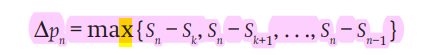

In [21]:
from pandas.core.indexes.extension import deprecate_ndim_indexing
import pandas as pd
import numpy as np

#設定一個空的k及dp, 初值皆為NaN
k = np.empty(len(hist))
dp = np.empty(len(hist))

k[:] = np.nan
dp[:] = np.nan

#將Volumn存在volume中
volume = list(hist[["Volume"]].iloc[:, 0])

#================================
#任意設定一個V0值
#================================
V0 = 1000000000

#找出每個索引值的k
for i in range(0, len(hist)):
    t=np.nan
    for j in range(i+1):
        if sum(volume[j:i]) < V0:
            t=j 
            break
    k[i]=t 

#找出每個索引值的dp
for i in range(0, len(hist)):
    t=[]
    for j in range(int(k[i]), i):
        t.append(volume[i]-volume[j])
  
    if len(t)==0:
        dp[i] = np.nan
    else:
        dp[i] = max(t)

#印dp
dp

array([          nan, -2.199560e+07, -1.531330e+07, -1.871610e+07,
       -1.052610e+07,  1.290840e+07,  9.501900e+06,  1.426700e+06,
        7.905700e+06,  4.574000e+07,  3.188340e+07,  2.356630e+07,
        4.268880e+07,  8.650900e+07, -1.424600e+06, -1.631320e+07,
        9.494000e+05, -2.282930e+07,  6.563000e+06,  1.078770e+07,
       -6.007700e+06, -2.575900e+06,  4.289300e+06,  4.471490e+07,
        3.953740e+07,  3.476460e+07,  3.713100e+07,  2.693610e+07,
        4.699260e+07,  1.636530e+07,  1.503220e+07,  2.473280e+07,
        2.066780e+07,  2.689440e+07,  2.000980e+07,  1.661530e+07,
        4.804370e+07,  8.748940e+07,  4.099320e+07,  3.347010e+07,
        4.151380e+07,  9.949490e+07,  2.412110e+07, -2.206140e+07,
       -1.299600e+06,  4.503800e+06, -2.448900e+06, -5.214200e+06,
       -2.422000e+06, -3.544200e+06,  1.958090e+07,  2.738570e+07,
        1.490050e+07, -8.757600e+06, -1.350000e+06,  8.411900e+06,
        2.159530e+07,  2.998540e+07,  2.883180e+07,  7.997010e

In [22]:
V0 = 10000
s_diff = [251, 0]
s_date = ["Date"]
n=251
for j in range(1, 251+1):
    v_sum = n        #Vk+Vk+1+......+Vn
    if(v_sum<V0):
      s_diff.append(251 - s_sum)
      s_date.append([n,j])
    
    dpn = max(s_diff) 
    ddn = [Daten,Datej]

NameError: ignored

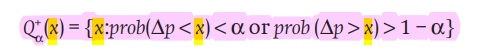

In [ ]:
#將dp(list)轉成df_dp(DataFrame)
df_dp = pd.DataFrame(dp)

#平均數/標準誤
m = float(df_dp.mean())
se = float(df_dp.std() / len(hist)**0.5)

#推論x值(假設a=0.05)
print(m-1.96*se)